### Scarping AesopMorals

In [9]:
from bs4 import BeautifulSoup
import requests
import pandas
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
doc_url = "https://www.litscape.com/indexes/Aesop/Titles.html"

urls = []
categories = []
tags = []
titles = []
stories = []
morals = []


with requests.Session() as session:
    
    result = session.get(doc_url, headers={"User-Agent": "Mozilla/5.0"})
    soup = BeautifulSoup(result.text, 'lxml')
    main_divs = soup.find(class_="multicolumn width300").find_all("a")

    for title in main_divs:
        url = "https://www.litscape.com" + title["href"]
        urls.append(url)
        
        result = session.get(url, headers={"User-Agent": "Mozilla/5.0"})
        soup = BeautifulSoup(result.text, 'lxml')
        
        titles.append(soup.find(class_="content").find("h1").get_text())
        
        stories.append(" ".join([stry.get_text() for stry in soup.find(class_="content").find_all("p", class_=None)[1:]]))
        
        moral = soup.find(class_="content").find("p", class_="moral")
        morals.append(moral.get_text() if moral != None else "")
        
data2 = pandas.DataFrame({
    "url": urls,
    "title": titles,
    "story": stories,
    "moral": morals
})
    
        
print(data2.head())            

                                                 url  \
0  https://www.litscape.com/author/Aesop/Jupiter_...   
1  https://www.litscape.com/author/Aesop/The_Ants...   
2  https://www.litscape.com/author/Aesop/The_Ass_...   
3  https://www.litscape.com/author/Aesop/The_Ass_...   
4  https://www.litscape.com/author/Aesop/The_Ass_...   

                          title  \
0        Jupiter and the Monkey   
1  The Ants and the Grasshopper   
2        The Ass and His Driver   
3     The Ass and His Purchaser   
4        The Ass and His Shadow   

                                               story  \
0  JUPITER ISSUED a proclamation to all the beast...   
1  THE ANTS were employing a fine winter's day in...   
2  AN ASS, being driven along a high road, sudden...   
3  A MAN wished to purchase an Ass, and agreed wi...   
4  A TRAVELER hired an Ass to convey him to a dis...   

                                               moral  
0  Moral:A mother's love blinds her to many imper...  
1    

In [87]:
data.to_csv('dataset/00_aesop_fables_scraped.csv', encoding='utf-8')

## Annotated data statistics

Number of Stories: 116
Total Words: 12662
Counter({'friends': 19, 'true-nature': 15, 'consequence': 13, 'worthiness': 10, 'trust': 9, 'effort': 7, 'content': 6, 'greed': 6, 'opportunity': 6, 'weak': 6, 'danger': 5, 'flattery': 4, 'respect': 4, 'lazy': 3, 'learn': 3})


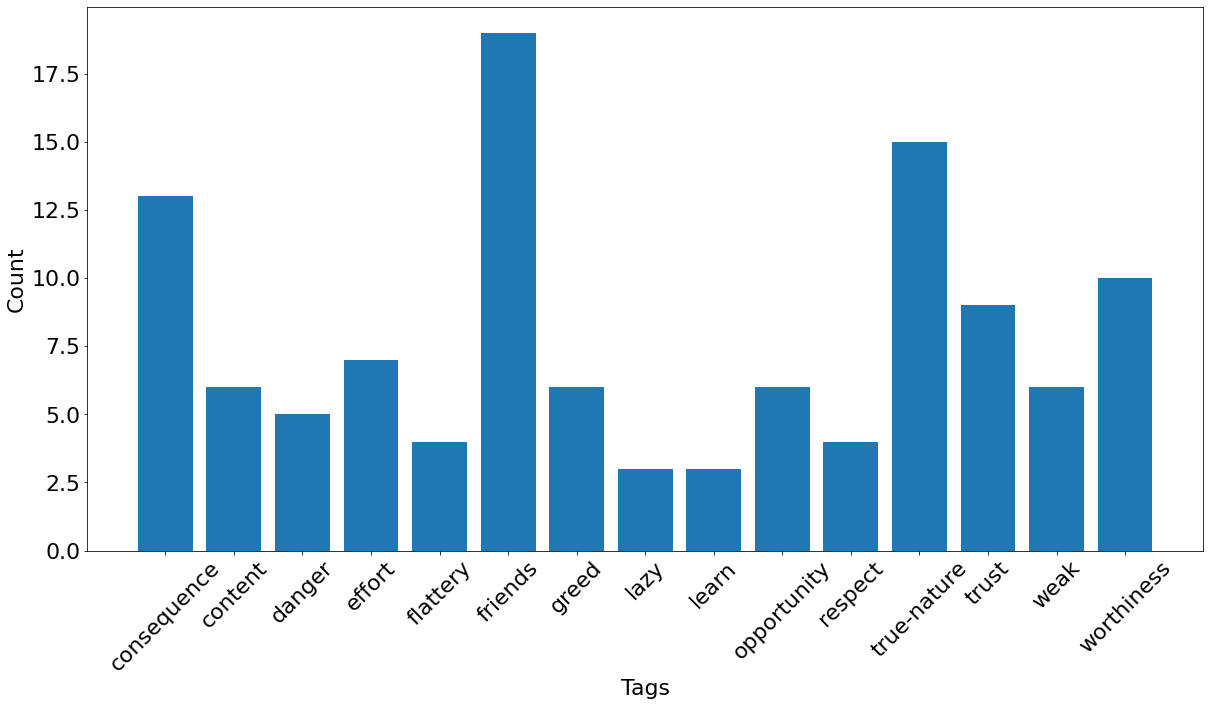

Words Distribution per Story:
                0
count  116.000000
mean   109.155172
std     51.586079
min     37.000000
25%     73.750000
50%    102.500000
75%    130.000000
max    354.000000


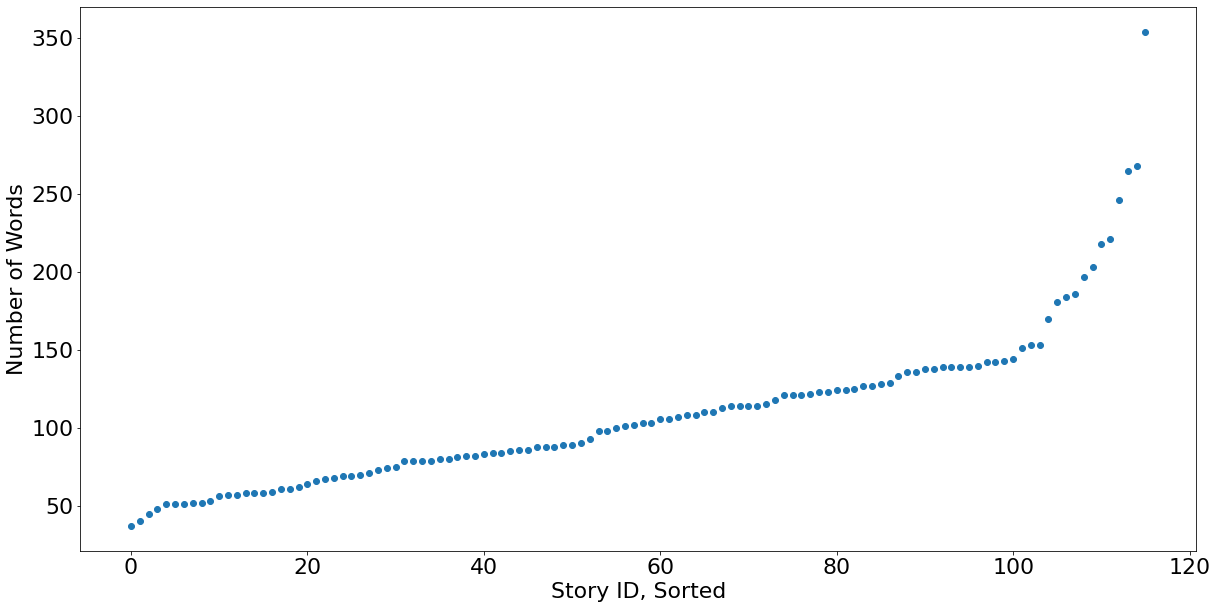

Sentence Distribution per Story:
                0
count  116.000000
mean     5.405172
std      2.388299
min      2.000000
25%      4.000000
50%      5.000000
75%      7.000000
max     17.000000


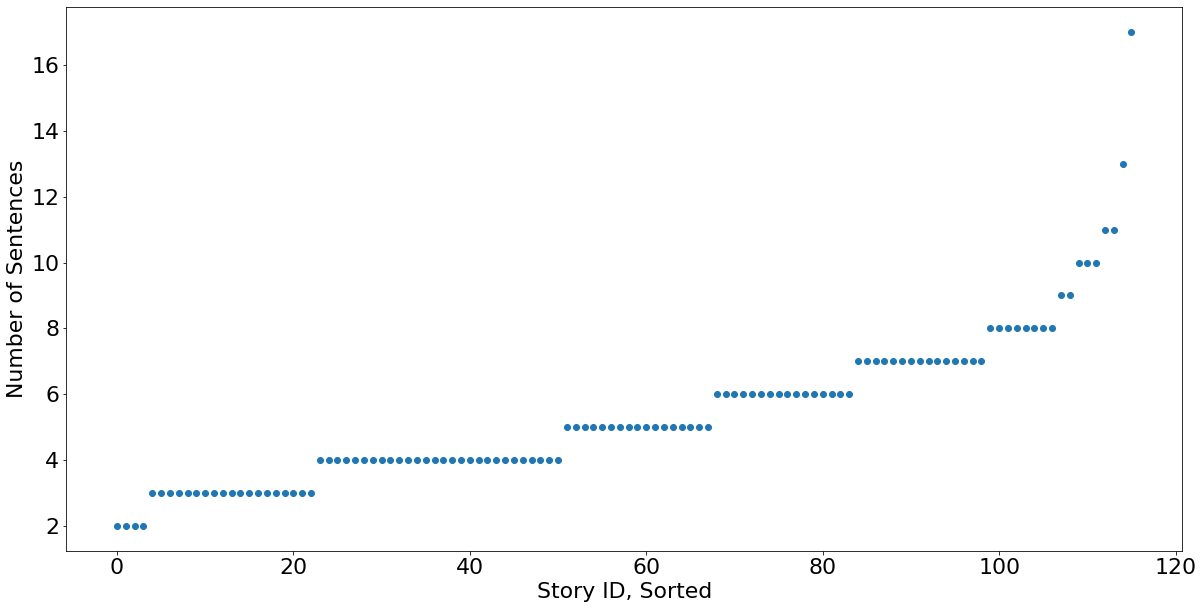

In [10]:
data = pandas.read_csv("/dataset/02_aesop_fables_annotated.csv")

stories = data["story"]

length = [len(story.split(" ")) for story in stories]
length_sen = [len(story.split(".")) for story in stories]

print("Number of Stories:" , len(stories))
print("Total Words:", sum(length))

count2 = Counter(data["tag"])
print(count2)

plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = [20, 10]
plt.bar(list(count2.keys()), list(count2.values()))
plt.ylabel("Count")
plt.xlabel("Tags")
plt.xticks(rotation=45)
plt.show()


print("Words Distribution per Story:")
print(pandas.DataFrame(length).describe())
plt.scatter(range(0, len(length)),sorted(length))
plt.ylabel("Number of Words")
plt.xlabel("Story ID, Sorted")
plt.show()

print("Sentence Distribution per Story:")
print(pandas.DataFrame(length_sen).describe())
plt.scatter(range(0, len(length_sen)),sorted(length_sen))
plt.ylabel("Number of Sentences")
plt.xlabel("Story ID, Sorted")
plt.show()

